In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [2]:
df = pd.read_csv(r"E:\AIML College\Assignment Seven\decision_tree.csv")

In [3]:
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,...,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,...,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,...,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,...,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,...,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,...,No,3,33,0,4,1,3,44,3,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [5]:
df.columns

Index(['Employee_ID', 'Age', 'Gender', 'Marital_Status', 'Department',
       'Job_Role', 'Job_Level', 'Monthly_Income', 'Hourly_Rate',
       'Years_at_Company', 'Years_in_Current_Role',
       'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction',
       'Performance_Rating', 'Training_Hours_Last_Year', 'Overtime',
       'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition'],
      dtype='object')

In [6]:
df.nunique()

Employee_ID                      1000
Age                                40
Gender                              2
Marital_Status                      3
Department                          5
Job_Role                            4
Job_Level                           5
Monthly_Income                    971
Hourly_Rate                        85
Years_at_Company                   29
Years_in_Current_Role              14
Years_Since_Last_Promotion         10
Work_Life_Balance                   4
Job_Satisfaction                    5
Performance_Rating                  4
Training_Hours_Last_Year          100
Overtime                            2
Project_Count                       9
Average_Hours_Worked_Per_Week      30
Absenteeism                        20
Work_Environment_Satisfaction       4
Relationship_with_Manager           4
Job_Involvement                     4
Distance_From_Home                 49
Number_of_Companies_Worked          4
Attrition                           2
dtype: int64

In [7]:
df.shape #For rows and columns

(1000, 26)

In [8]:
# Attrition Analysis
attrition_counts = df['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']
print("Attrition Counts:")
print(attrition_counts)

Attrition Counts:
  Attrition  Count
0        No    811
1       Yes    189


|--- Training_Hours_Last_Year <= 2.50
|   |--- class: No
|--- Training_Hours_Last_Year >  2.50
|   |--- Average_Hours_Worked_Per_Week <= 38.50
|   |   |--- Project_Count <= 1.50
|   |   |   |--- class: No
|   |   |--- Project_Count >  1.50
|   |   |   |--- Training_Hours_Last_Year <= 3.50
|   |   |   |   |--- class: Yes
|   |   |   |--- Training_Hours_Last_Year >  3.50
|   |   |   |   |--- Absenteeism <= 5.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Absenteeism >  5.50
|   |   |   |   |   |--- class: No
|   |--- Average_Hours_Worked_Per_Week >  38.50
|   |   |--- Training_Hours_Last_Year <= 77.50
|   |   |   |--- Hourly_Rate <= 16.50
|   |   |   |   |--- class: No
|   |   |   |--- Hourly_Rate >  16.50
|   |   |   |   |--- Years_at_Company <= 8.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Years_at_Company >  8.50
|   |   |   |   |   |--- class: No
|   |   |--- Training_Hours_Last_Year >  77.50
|   |   |   |--- Job_Level <= 4.50
|   |   |   |   |--- Monthly_I

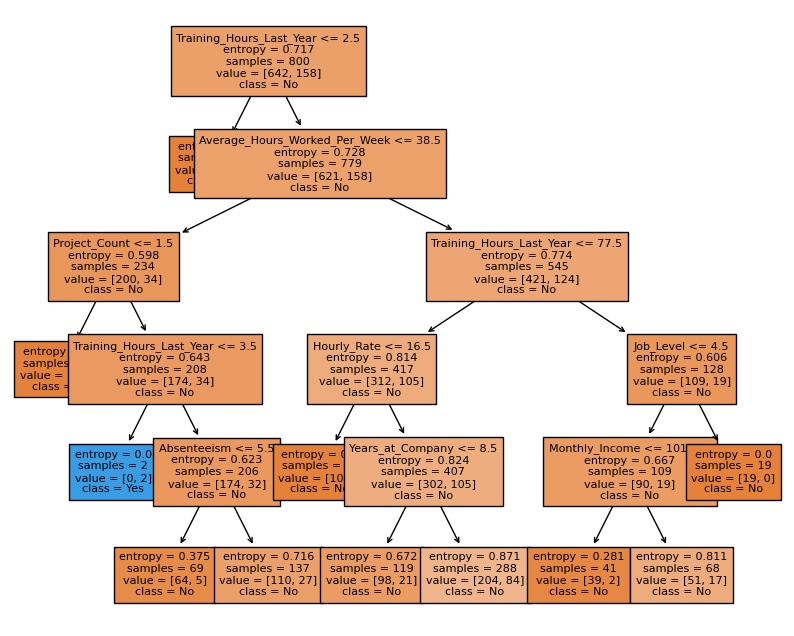

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Target column: Attrition
X = df.drop(columns=["Attrition", "Employee_ID"])  # drop target + ID
y = df["Attrition"]

# Handle categorical variables (convert to numeric)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Build Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Show rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# Evaluate
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()
